# Delicious Asian and Indian Cuisines 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [17]:
df = pd.read_csv("../data/cuisines.csv")
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<Axes: ylabel='cuisine'>

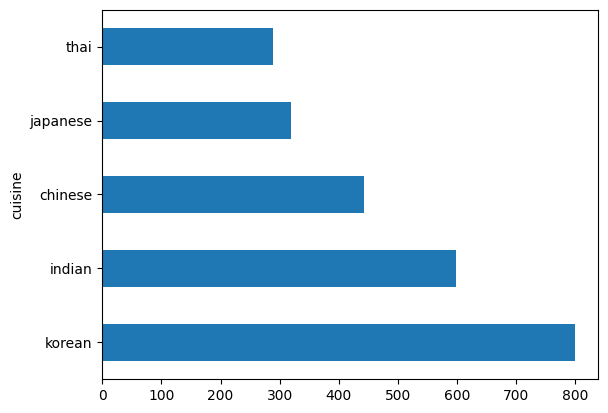

In [28]:
df.cuisine.value_counts().plot.barh()

In [20]:
#split cuisine
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'korean_df: {korean_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')



thai df: (289, 385)
japanese df: (320, 385)
korean_df: (799, 385)
chinese df: (442, 385)
indian df: (598, 385)


In [48]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    ingredient_df.rename_axis(index = "ingredients", inplace=True)
    return ingredient_df

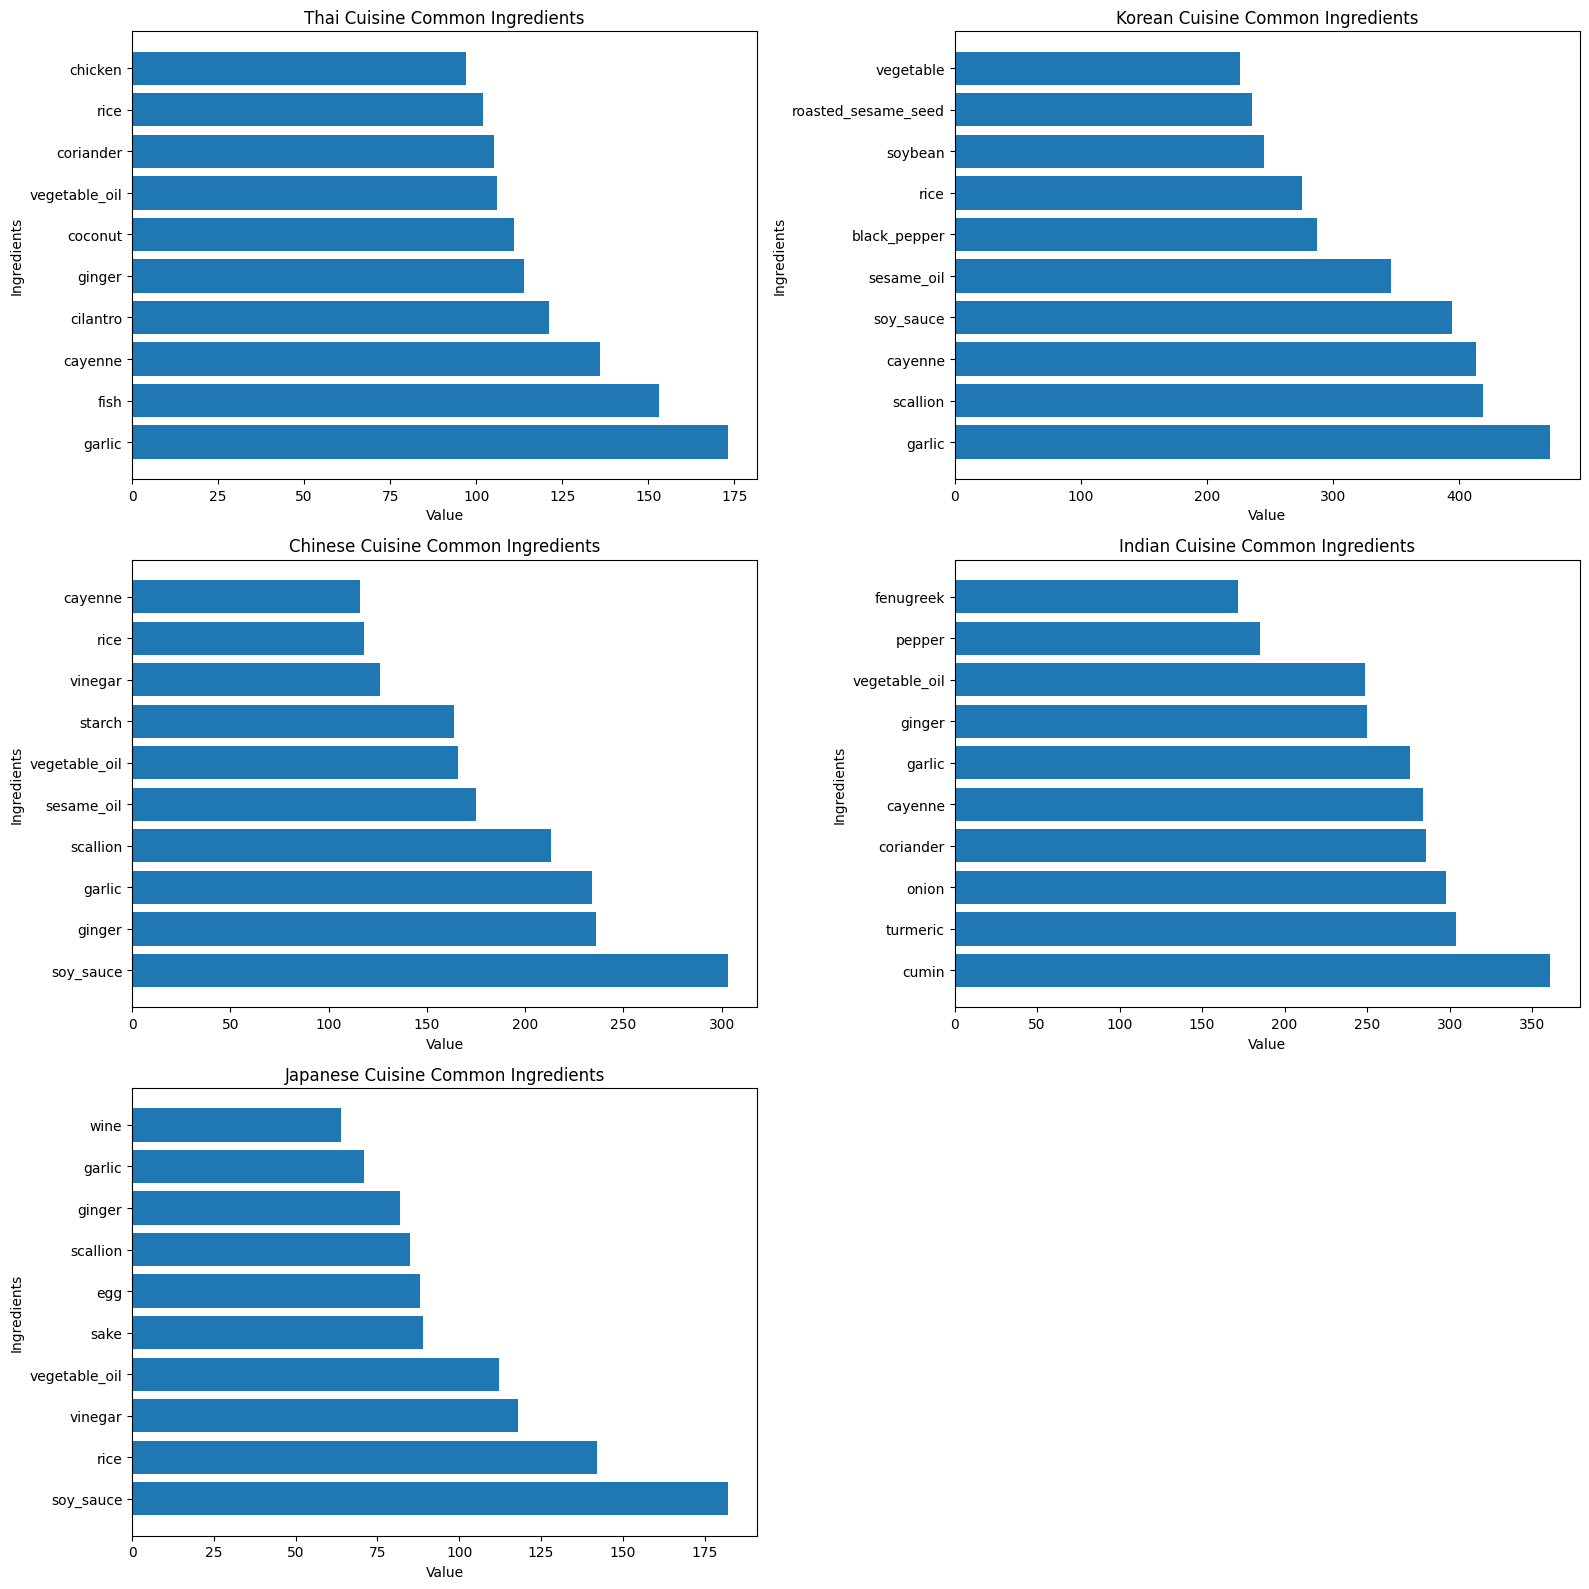

In [73]:
#create ingredient dataframe from each country
thai_ingredient_df = create_ingredient_df(thai_df)
japanese_ingredient_df = create_ingredient_df(japanese_df)
chinese_ingredient_df = create_ingredient_df(chinese_df)
indian_ingredient_df = create_ingredient_df(indian_df)
korean_ingredient_df = create_ingredient_df(korean_df)

# Prepare the subplots
fig, axs = plt.subplots(3, 2, figsize=(16, 16))  # Adjust the figsize as needed

# List of ingredient dataframes and corresponding country names
country_ingredients = [thai_ingredient_df, korean_ingredient_df, chinese_ingredient_df, indian_ingredient_df, japanese_ingredient_df]
country_names = ['Thai', 'Korean', 'Chinese', 'Indian', 'Japanese']

# Iterate through the dataframes and plot
for k, (name, ingredients) in enumerate(zip(country_names, country_ingredients)):
    row, col = divmod(k, 2)
    axs[row, col].barh(ingredients.head(10).index, width=ingredients.head(10).value)
    axs[row, col].set_title(name + " Cuisine Common Ingredients")
    axs[row, col].set_xlabel("Value")
    axs[row, col].set_ylabel("Ingredients")

# Remove the last empty subplot if there are an odd number of plots
if len(country_ingredients) % 2 != 0:
    fig.delaxes(axs[-1, -1])

# Automatically adjust the layout
fig.tight_layout()
# Show the plot
plt.show()

In [75]:
#Dropping rice, garlic, and ginger from features to remove confusion between distinct cuisines
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [77]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [78]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


In [79]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')

In [80]:
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("../data/cleaned_cuisines.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB
